In [10]:
import numpy as np
import scipy as sp
from scipy.sparse import coo_matrix, dok_matrix, load_npz

import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

In [11]:
def read_sparse_matrix_from_file(filename):
    try:
        with open(filename, 'r') as file:

            row, col = map(int, file.readline().split())
            # Read the number of rows and columns

            matrix = dok_matrix((row, col), dtype=float)

            # Read non-zero entries
            for line in file:
                row, col, value = map(float, line.split())
                matrix[int(row), int(col)] = value

            return matrix.tocsr()
    except FileNotFoundError:
        print(f"Unable to open file: {filename}")
        return coo_matrix((0, 0), dtype=float)

In [12]:
matrix_pre = load_npz('/home/mephisto/repos/linkml_cpp/matrix_pre.npz')
matrix_after = load_npz('/home/mephisto/repos/linkml_cpp/matrix_after.npz')

In [13]:
sparse_matrix_pre = read_sparse_matrix_from_file('/home/mephisto/repos/linkml_cpp/sparse_matrix_pre.txt')
sparse_matrix_after = read_sparse_matrix_from_file('/home/mephisto/repos/linkml_cpp/sparse_matrix_after.txt')

<bound method _spbase.__str__ of <869x869 sparse matrix of type '<class 'numpy.float32'>'
	with 67445 stored elements in Compressed Sparse Row format>>


<bound method _spbase.__str__ of <869x869 sparse matrix of type '<class 'numpy.float64'>'
	with 67445 stored elements in Compressed Sparse Row format>>


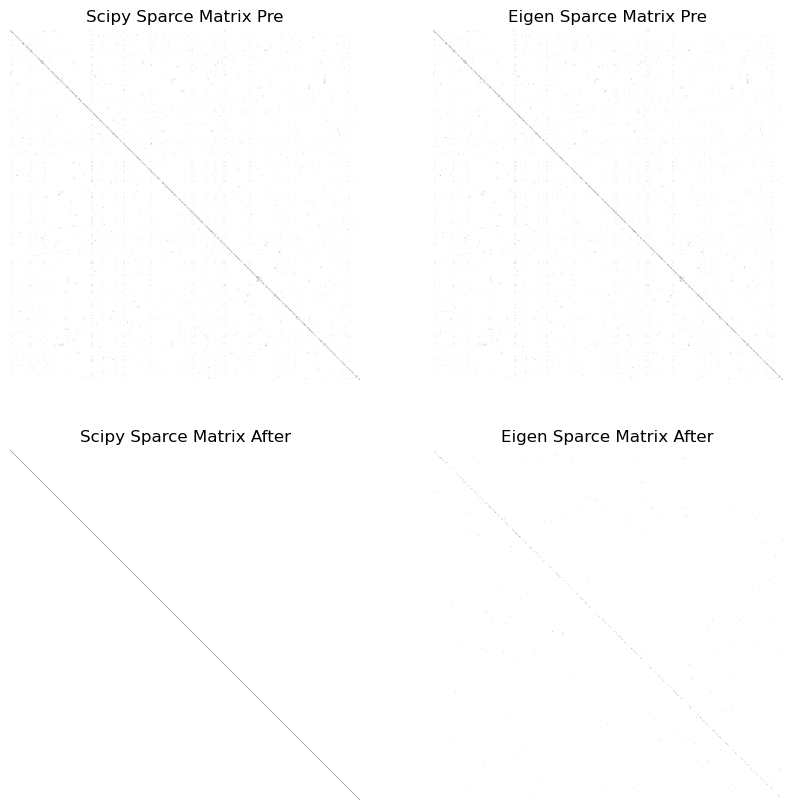

In [14]:
print(matrix_pre.__str__)
print("\n")
print(sparse_matrix_pre.__str__)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0,0].set_title("Scipy Sparce Matrix Pre")
axs[0,0].axis('off')
axs[0,0].imshow(normalize(np.asarray(matrix_pre.todense())), cmap='gray_r')

axs[0,1].set_title("Eigen Sparce Matrix Pre")
axs[0,1].axis('off')
axs[0,1].imshow(normalize(np.asarray(sparse_matrix_pre.todense())), cmap='gray_r')

axs[1,0].set_title("Scipy Sparce Matrix After")
axs[1,0].axis('off')
axs[1,0].imshow(normalize(np.asarray(matrix_after.todense())), cmap='gray_r')
axs[1,1].set_title("Eigen Sparce Matrix After")
axs[1,1].axis('off')
axs[1,1].imshow(normalize(np.asarray(sparse_matrix_after.todense())), cmap='gray_r')

plt.show()

In [15]:
import markov_clustering as mc

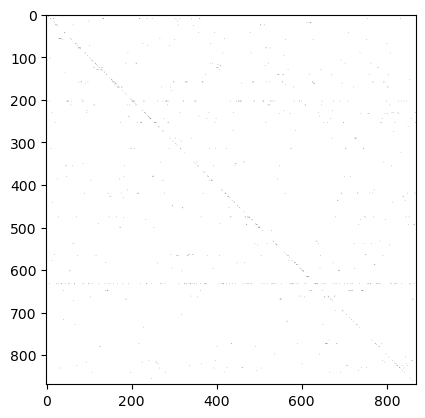

In [21]:
plt.imshow(mc.run_mcl(np.asarray(sparse_matrix_pre.todense())), cmap='gray_r')
plt.show()

In [17]:
# helper function, outputs "(i,j)  v"
def tostr(row1, col1, data1, row2, col2, data2):
    triples1 = zip(list(zip(row1, col1)), data1)
    triples2 = zip(list(zip(row2, col2)), data2)

    triples1 = zip(triples1, triples2)


    return '\n'.join([('  %s\t\t%s' % t) for t in triples1])


def compare(A, B, n=10):
    A = A.tocoo()
    B = B.tocoo()
    print(tostr(A.row[:n], A.col[:n], A.data[:n], B.row[:n], B.col[:n], B.data[:n]))



In [22]:
mc.converged(matrix_pre, sparse_matrix_pre)

True

In [29]:
mc.converged(mc.run_mcl(matrix_pre, inflation=3), sparse_matrix_after)

True

In [24]:
compare(matrix_pre, sparse_matrix_pre)

  ((0, 0), 14.708494)		((0, 0), 14.7085)
  ((0, 1), 9.916355)		((0, 1), 9.91636)
  ((0, 2), 9.160288)		((0, 2), 9.16029)
  ((0, 69), 1.1142612)		((0, 69), 1.11426)
  ((0, 106), 3.6795373)		((0, 106), 3.67954)
  ((0, 107), 7.660964)		((0, 107), 7.66096)
  ((0, 112), 2.153848)		((0, 112), 2.15385)
  ((0, 113), 2.2971282)		((0, 113), 2.29713)
  ((0, 183), 0.4687527)		((0, 183), 0.468753)
  ((0, 203), 2.1424334)		((0, 203), 2.14243)
